*TODO: Introduction*
    
Trips in NYC with timestamp, pickup and dropoff locations and few other features. We will be mainly interested in the relationship between variables.

We will be using mainly python modules `pandas` for data representation and `matplotlib` and `seaborn` for plotting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import seaborn as sns

In [2]:
LABEL_SIZE = 14
mpl.rcParams['xtick.labelsize'] = LABEL_SIZE 
mpl.rcParams['ytick.labelsize'] = LABEL_SIZE
mpl.rcParams['legend.fontsize'] = LABEL_SIZE

In [3]:
def precision(x, precision):
    return np.round(x / precision) * precision

Load the dataset.

data link: ...

*TODO: Download the dataset from the internet.*


In [4]:
df = pd.read_csv('~/Downloads/NYC/train.csv', index_col='id')
# TODO: do we want to use e.g. 100k sample to make things faster?
df = df.head(1000000)
df.shape

(1000000, 10)

View first 5 columns of the dataset.

In [5]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Look at the values in the column `store_and_fwd_flag`.

In [6]:
df['store_and_fwd_flag'].value_counts()

N    994460
Y      5540
Name: store_and_fwd_flag, dtype: int64

As the values are only **Y** or **N**, we can replace the values with a binary feature where **1** means **Y** and **0** means **N**.

In [7]:
df['store_and_fwd_flag'] = (df['store_and_fwd_flag'] == 'Y').astype(int)

Convert the `trip_duration` from seconds to minutes for convenience.

In [8]:
df['trip_duration'] = df['trip_duration'] / 60.0

Let's see the dataframe with the modified columns.

In [9]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,7.583333
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,11.050000
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,35.400000
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,7.150000
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,7.250000


Check the types of the columns and missing values.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, id2875421 to id3327778
Data columns (total 10 columns):
vendor_id             1000000 non-null int64
pickup_datetime       1000000 non-null object
dropoff_datetime      1000000 non-null object
passenger_count       1000000 non-null int64
pickup_longitude      1000000 non-null float64
pickup_latitude       1000000 non-null float64
dropoff_longitude     1000000 non-null float64
dropoff_latitude      1000000 non-null float64
store_and_fwd_flag    1000000 non-null int64
trip_duration         1000000 non-null float64
dtypes: float64(5), int64(3), object(2)
memory usage: 83.9+ MB


Each column has as many non-null values as there are entries in the dataframe. This indicates we have **no missing values**.

The column `pickup_datetime` has a type **object** which in this case means  **string**. Let's convert the column to a **datetime** type.

In [11]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

Now we can see that the type changed from **object** to **datetime64[ns]**.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, id2875421 to id3327778
Data columns (total 10 columns):
vendor_id             1000000 non-null int64
pickup_datetime       1000000 non-null datetime64[ns]
dropoff_datetime      1000000 non-null object
passenger_count       1000000 non-null int64
pickup_longitude      1000000 non-null float64
pickup_latitude       1000000 non-null float64
dropoff_longitude     1000000 non-null float64
dropoff_latitude      1000000 non-null float64
store_and_fwd_flag    1000000 non-null int64
trip_duration         1000000 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 83.9+ MB


## TASK 1
- Which columns include only few different values?
- Which columns contain outliers?

The function `describe` shows minimum and maximum of each column, as well as mean, quantiles and other statistics.

It is similar to R's `summary` function.

In [13]:
df.describe(percentiles=[0.1, 0.25, 0.75, 0.9])

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,1.534456,1.664537,-73.973426,40.750937,-73.973351,40.751824,0.005540,16.049026
std,0.498812,1.314415,0.043007,0.034068,0.042717,0.036651,0.074225,99.219297
min,1.000000,0.000000,-78.547401,34.359695,-79.817978,32.181141,0.000000,0.016667
10%,1.000000,1.000000,-74.002655,40.720150,-74.002838,40.715397,0.000000,4.083333
25%,1.000000,1.000000,-73.991859,40.737361,-73.991318,40.735928,0.000000,6.616667
50%,2.000000,1.000000,-73.981735,40.754147,-73.979729,40.754528,0.000000,11.033333
75%,2.000000,2.000000,-73.967323,40.768368,-73.963013,40.769836,0.000000,17.916667
90%,2.000000,4.000000,-73.951881,40.780464,-73.947197,40.784946,0.000000,27.266667
max,2.000000,9.000000,-61.335529,51.881084,-61.335529,43.911762,1.000000,58771.366667


We could also visualize the previous summary using boxplots.

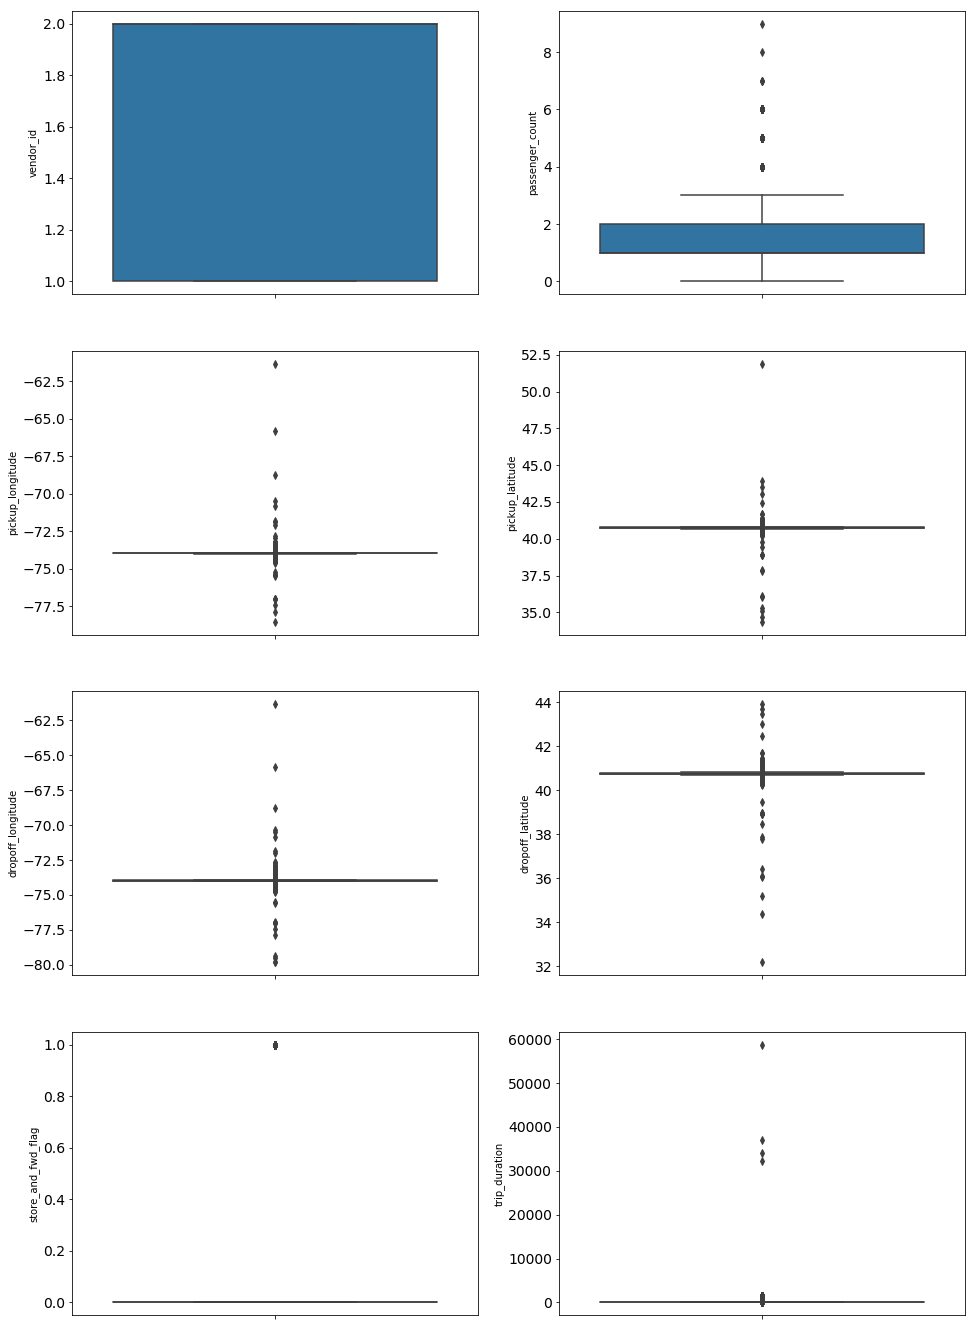

In [14]:
numeric_columns = df.select_dtypes(include=np.number).columns
PLOT_ROWS = 4
PLOT_COLS = int(np.ceil(len(numeric_columns) / PLOT_ROWS))

fig, axn = plt.subplots(PLOT_ROWS, PLOT_COLS, figsize=(16, 24))
for col, ax in zip(numeric_columns, axn.flatten()):
    sns.boxplot(df[col], orient='v', ax=ax)

*possible TODO: boxplots look different than defined in the Part 1*

## TASK 2
- Eliminate outliers from the column `trip_duration`.

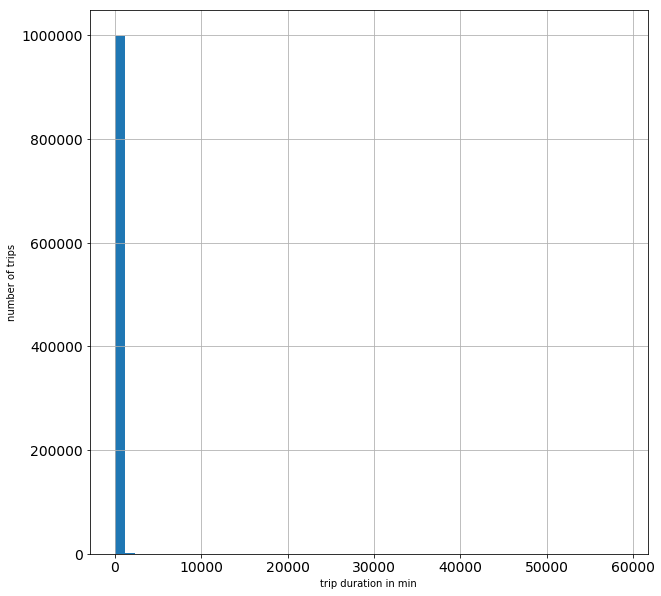

In [15]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.hist(df['trip_duration'], bins=50)
ax.set_xlabel('trip duration in min')
ax.set_ylabel('number of trips')
ax.grid()

Vast majority in the first bin. This means there are few tours with a very high trip duration.

What now?

**Log transform on y-axis.**

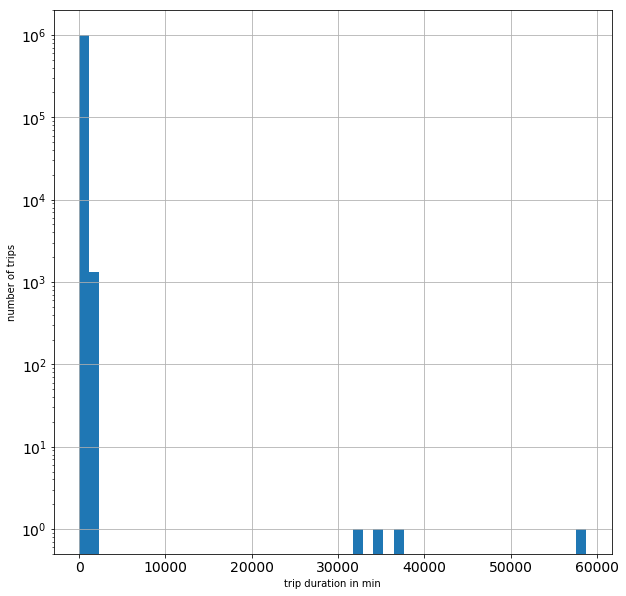

In [16]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.hist(df['trip_duration'], bins=50)
ax.set_xlabel('trip duration in min')
ax.set_ylabel('number of trips')
ax.set_yscale('log')
ax.grid()

Aah, few trips over 20000 minutes. We can safely filter those out.

In [17]:
df = df[df['trip_duration'] < 20000]

Continue exploring the distribution of `trip_duration` further and keep filtering out values until you are happy with the result.

- Which values did you filter out and why? (Don't forget to look not only at big values but also very small values.)
- Show the distribution after filtering outliers.

*POSSIBLE SOLUTION*

In [18]:
df = df[df['trip_duration'].between(1,150)]

## TASK 3
Filter out outliers in location columns (`pickup_longitude`, `pickup_latitude`, `dropoff_longitude` and `dropoff_latitude`).

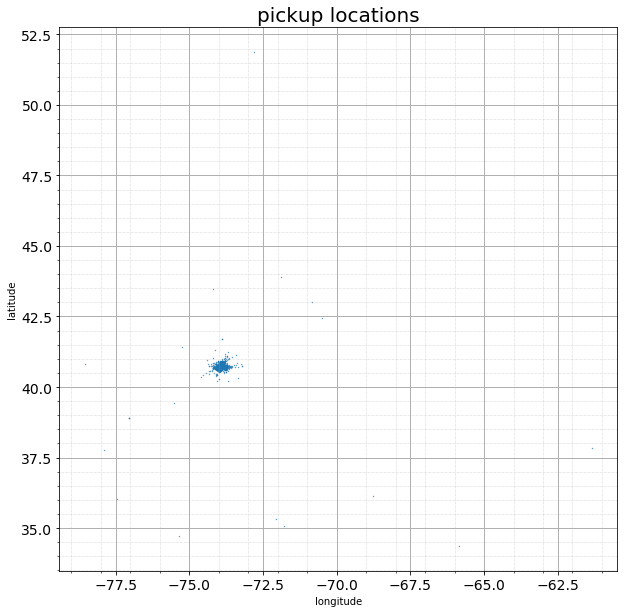

In [19]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.scatter(df['pickup_longitude'],
           df['pickup_latitude'],
           marker='.',
           s=0.5)
ax.set_title('pickup locations', fontsize=20)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.grid(which='minor', linestyle=':', linewidth=0.5)
ax.grid(which='major', linestyle='-', linewidth=1)

In [20]:
df = df[df['pickup_latitude'].between(40, 41.5) & \
         df['pickup_longitude'].between(-75, -73)
        ]

After filtering the singular points far from NYC, let's plot the trip pickups again, this time showing its duration with a color.

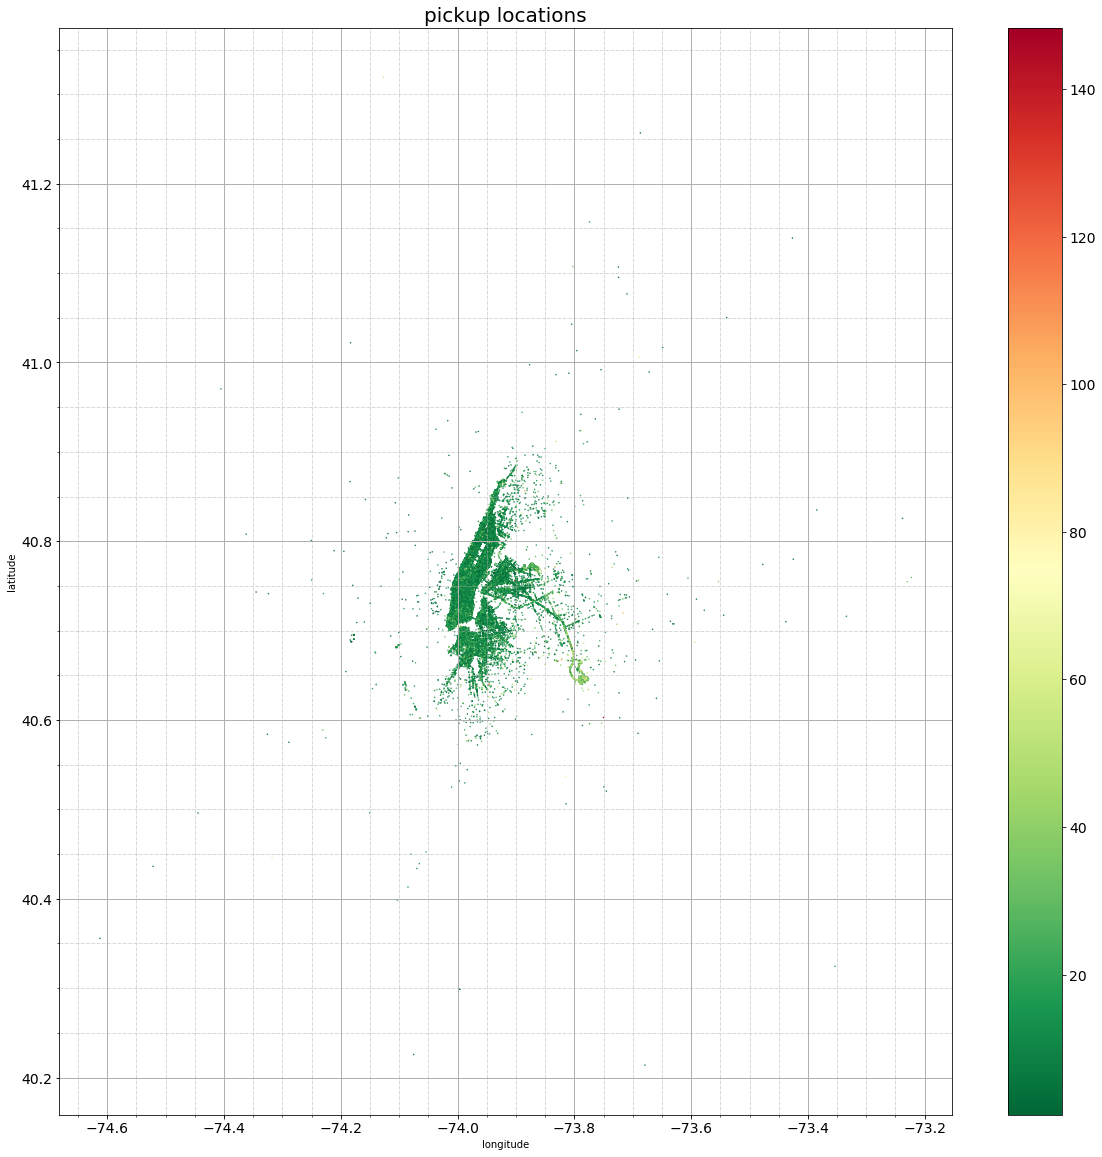

In [21]:
fig = plt.figure(figsize=(20,20))
ax = fig.gca()
s = ax.scatter(df['pickup_longitude'],
               df['pickup_latitude'],
               marker='.',
               s=1,
               c=df['trip_duration'],
               cmap='RdYlGn_r')
ax.set_title('pickup locations', fontsize=20)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.xaxis.set_minor_locator(MultipleLocator(0.05))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.grid(which='minor', linestyle='-.', linewidth=0.5)
ax.grid(which='major', linestyle='-', linewidth=1)
fig.colorbar(s)

In [22]:
df = df[df['pickup_latitude'].between(40.55, 40.95) & \
         df['pickup_longitude'].between(-74.1, -73.7)
        ]

Now we can filter some trips far from the city again. Then we get a nice city map.

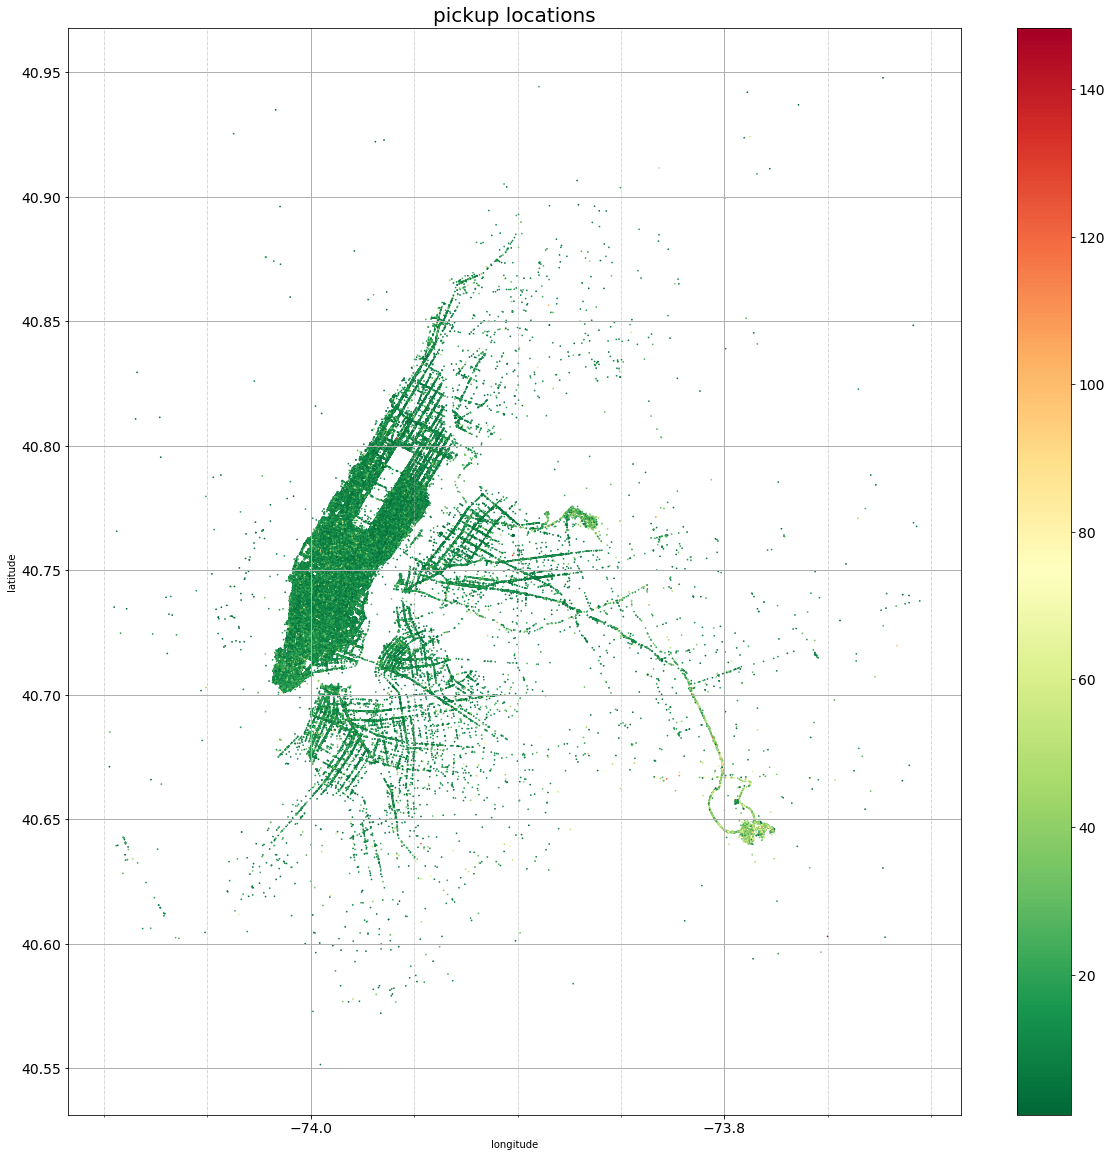

In [23]:
fig = plt.figure(figsize=(20,20))
ax = fig.gca()
s = ax.scatter(df['pickup_longitude'],
               df['pickup_latitude'],
               marker='.',
               s=2,
               c=df['trip_duration'],
               cmap='RdYlGn_r')
ax.set_title('pickup locations', fontsize=20)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.xaxis.set_minor_locator(MultipleLocator(0.05))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.grid(which='minor', linestyle='-.', linewidth=0.5)
ax.grid(which='major', linestyle='-', linewidth=1)
fig.colorbar(s)

As we have many points, let's group them together into bigger areas and put a color on each area based on the mean trip duration of all trips in that area.

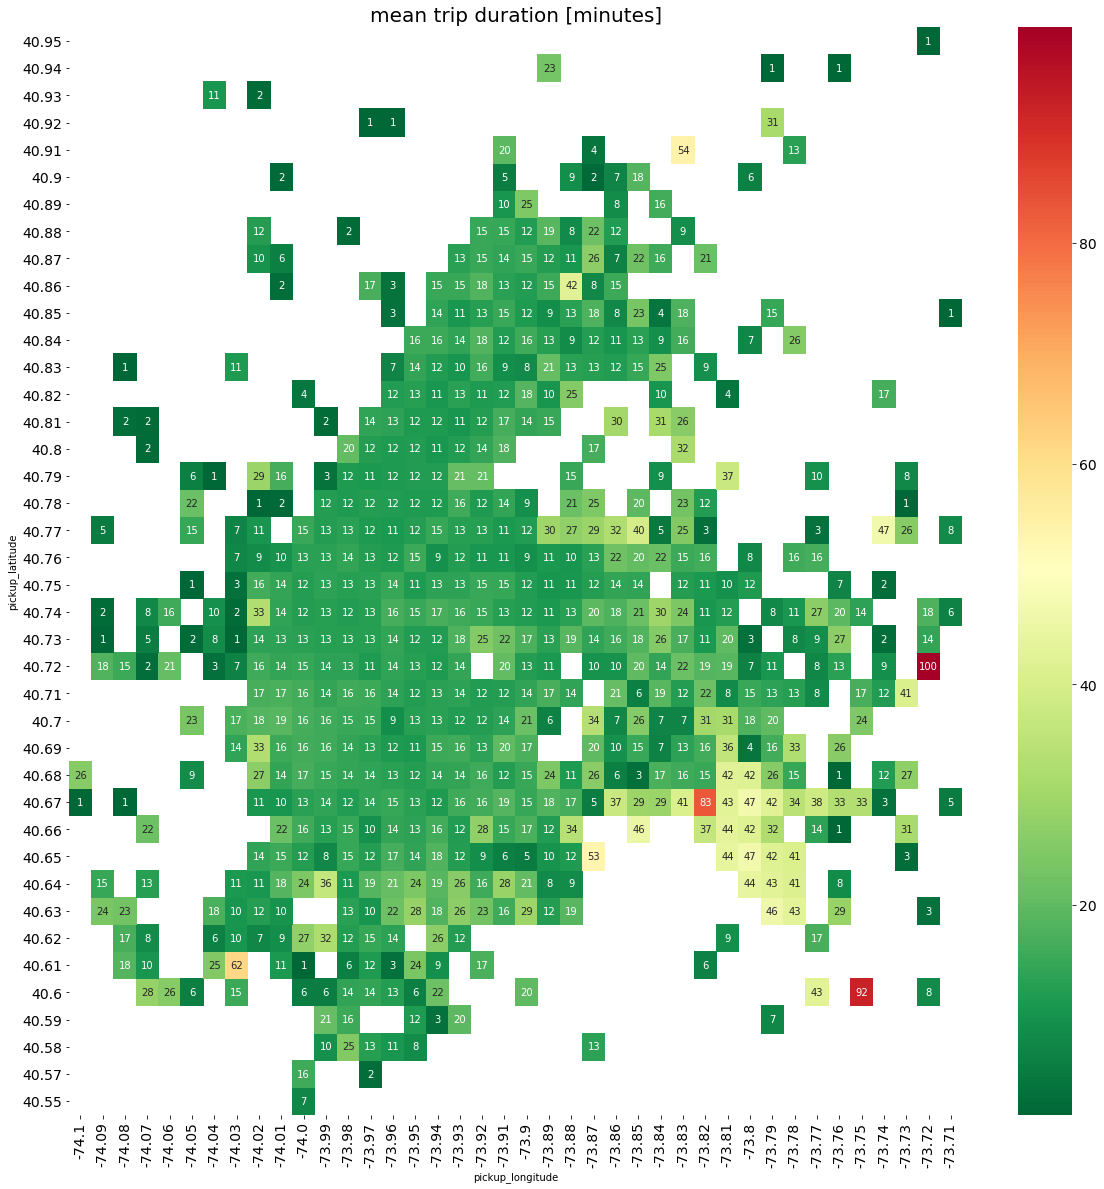

In [24]:
trip_pickup = df.groupby([df['pickup_longitude'].round(2),
                          df['pickup_latitude'].round(2)]
                        )['trip_duration'].mean().reset_index()

trip_pickup_pivot = trip_pickup.pivot('pickup_latitude','pickup_longitude','trip_duration')
fig = plt.figure(figsize=(20, 20))
ax = fig.gca()
sns.heatmap(trip_pickup_pivot,
            cmap='RdYlGn_r',
            ax=ax,
            annot=True,
            fmt=".0f")
ax.set_title('mean trip duration [minutes]', fontsize=20)
ax.invert_yaxis()

Do the same for `dropoff_longitude` and `dropoff_latitude` to filter out trips going too far from New York.

## TASK 4
- When during the week do the customers make the shortest trips?
- When do they make the longest trips?

In [25]:
df['weekday'] = df['pickup_datetime'].dt.weekday
df['hour'] = df['pickup_datetime'].dt.hour

Convert each week and hour into a number 0-167 representing number of hours since Monday midnight.

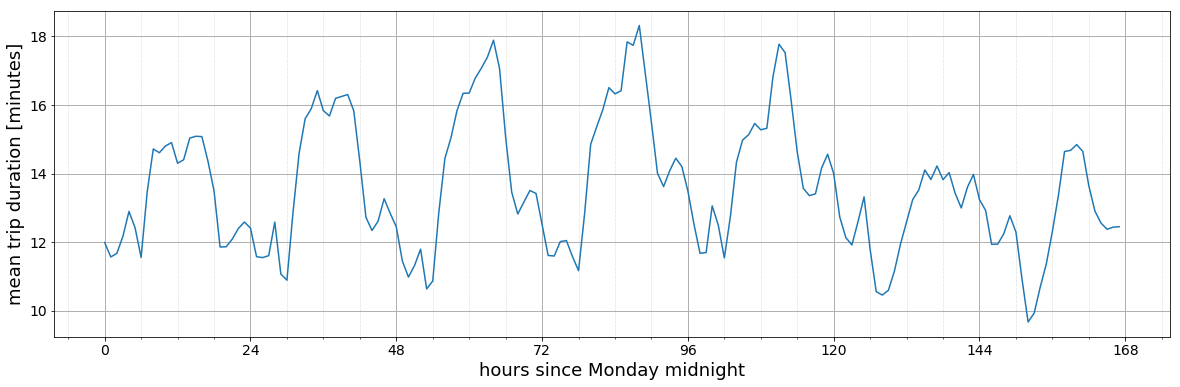

In [26]:
df['week_hours'] = df['weekday'] * 24 + df['hour']

week_hours = df.groupby('week_hours')['trip_duration'].mean()

fig = plt.figure(figsize=(20,6))
ax = fig.gca()
ax.plot(week_hours)
ax.set_xlabel('hours since Monday midnight', fontsize=18)
ax.set_ylabel('mean trip duration [minutes]', fontsize=18)
ax.xaxis.set_major_locator(MultipleLocator(24))
ax.xaxis.set_minor_locator(MultipleLocator(6))
ax.grid(which='minor', linestyle=':', linewidth=0.5)
ax.grid(which='major', linestyle='-', linewidth=1)

We can visualize the same thing as a table with `weekdays` \* `hours` and the value in the cell represents the measure - in our case the *mean trip duration*.

Text(155,0.5,'')

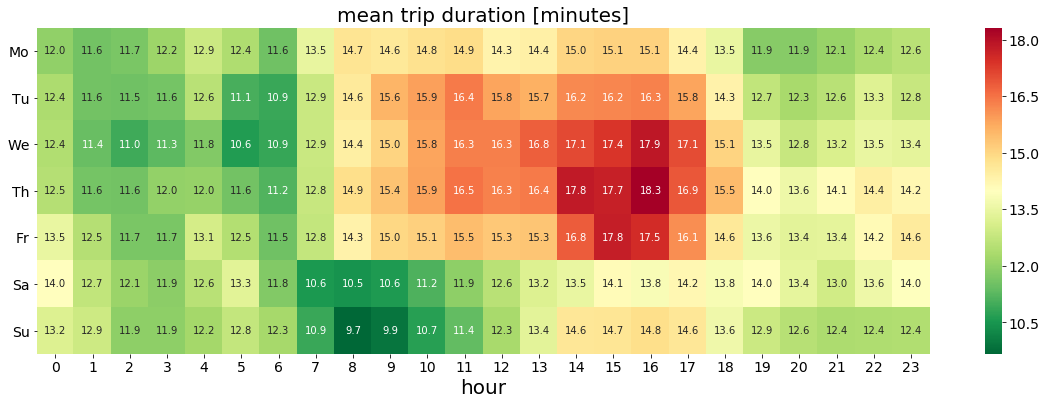

In [27]:
trip_duration_per_weekday_hour = df.groupby(['weekday',
                                             'hour']
                                           )['trip_duration'].mean().reset_index()
trip_duration_pivot = trip_duration_per_weekday_hour.pivot('weekday','hour','trip_duration')
fig = plt.figure(figsize=(20, 6))
ax = fig.gca()
sns.heatmap(trip_duration_pivot,
            cmap='RdYlGn_r',
            ax=ax,
            annot=True,
            fmt=".1f")
ax.set_title('mean trip duration [minutes]', fontsize=20)
ax.set_xlabel('hour', fontsize=20)
WEEKDAYS = ['Mo', 'Tu', 'We', 'Th', 'Fr', 'Sa', 'Su']
ax.set_yticklabels(WEEKDAYS, rotation='horizontal')
ax.set_ylabel('', fontsize=20)

## TASK 5

### Vendor vs. pickup location
In which area is vendor 1 more popular then vendor 2?
- *Hint: modify the code for heatmap from  TASK 3*

*SOLUTION:*

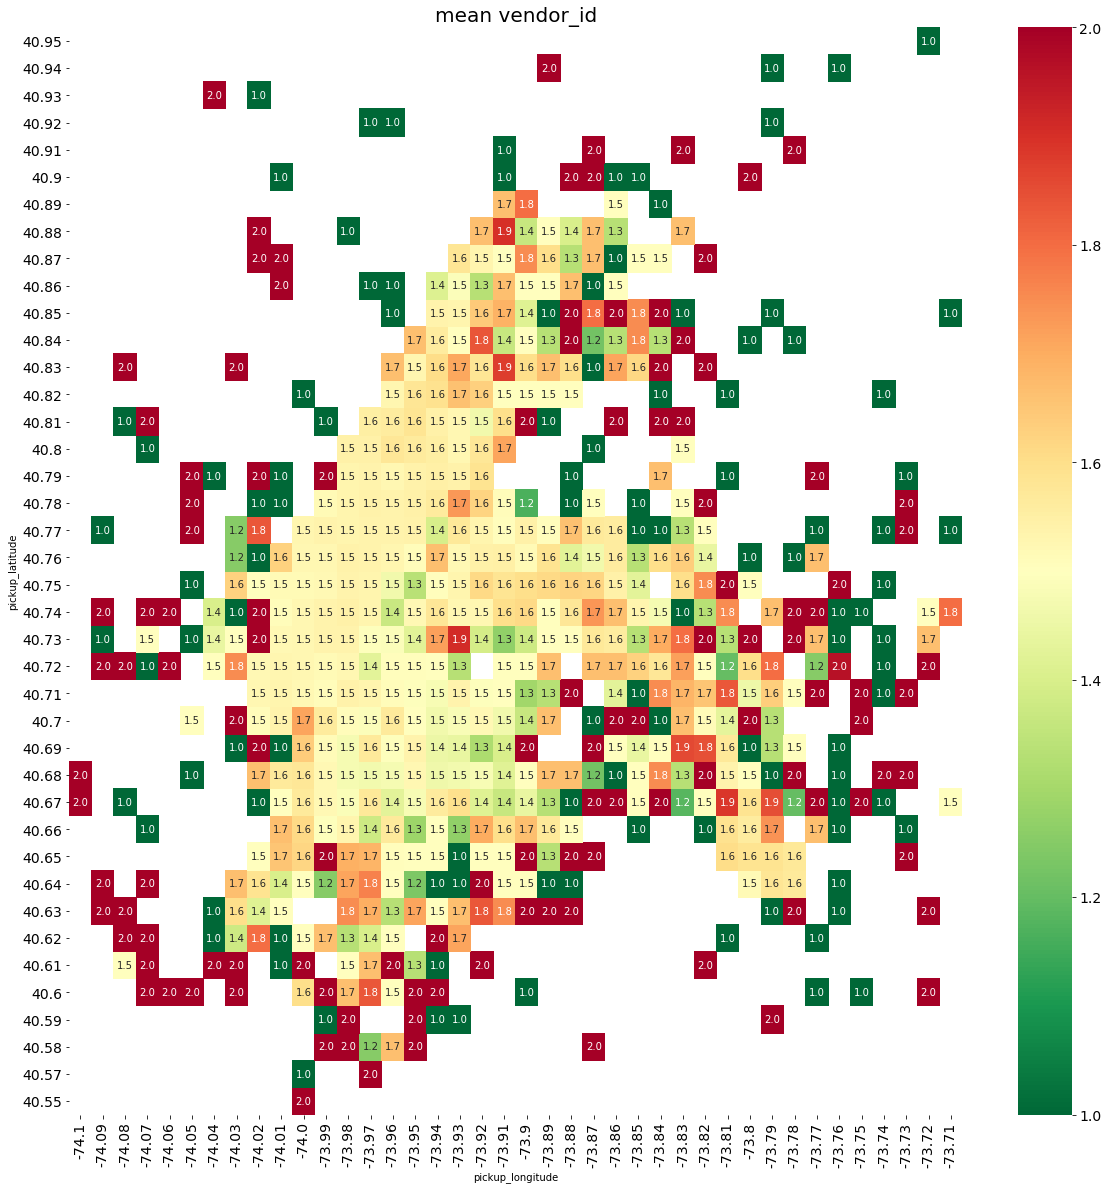

In [28]:
vendor_pickup = df.groupby([df['pickup_longitude'].round(2),
                          df['pickup_latitude'].round(2)]
                        )['vendor_id'].mean().reset_index()

vendor_pickup_pivot = vendor_pickup.pivot('pickup_latitude','pickup_longitude','vendor_id')
fig = plt.figure(figsize=(20, 20))
ax = fig.gca()
sns.heatmap(vendor_pickup_pivot,
            cmap='RdYlGn_r',
            ax=ax,
            annot=True,
            fmt=".1f"
           )
ax.set_title('mean vendor_id', fontsize=20)
ax.invert_yaxis()

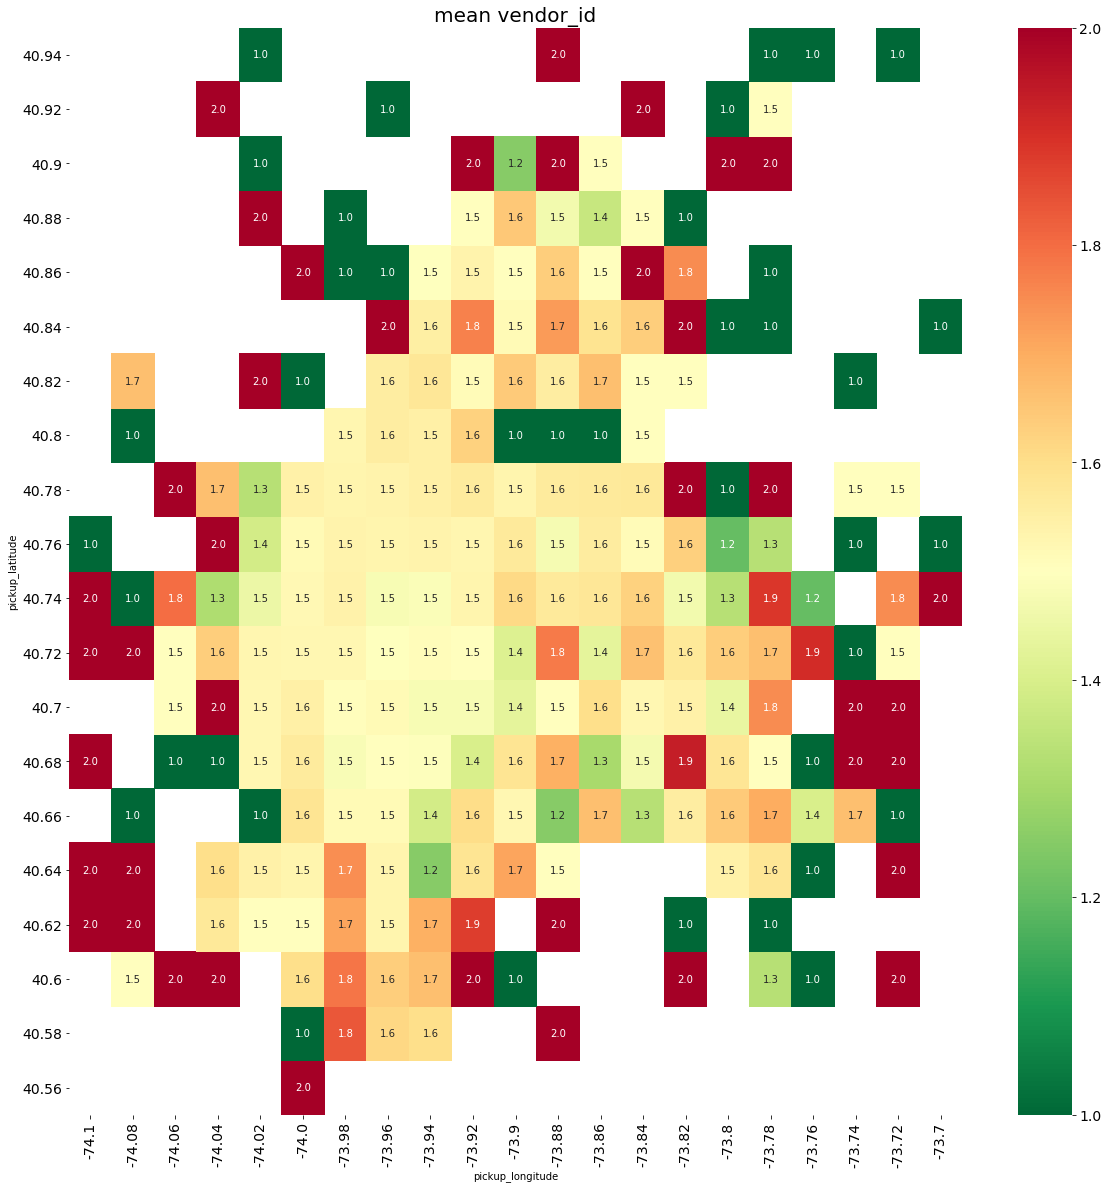

In [29]:
vendor_pickup = df.groupby([precision(df['pickup_longitude'], 0.02),
                          precision(df['pickup_latitude'], 0.02)]
                        )['vendor_id'].mean().reset_index().round(3)

vendor_pickup_pivot = vendor_pickup.pivot('pickup_latitude','pickup_longitude','vendor_id').round(5)
fig = plt.figure(figsize=(20, 20))
ax = fig.gca()
sns.heatmap(vendor_pickup_pivot,
            cmap='RdYlGn_r',
            ax=ax,
            center=1.5,
            annot=True,
            fmt=".1f"
           )
ax.set_title('mean vendor_id', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')
ax.set_yticklabels(ax.get_yticklabels(), rotation='horizontal')
ax.invert_yaxis()

## TASK 6
### Vendor vs. datetime
In which times is vendor 1 more popular then vendor 2?
- you can adapt both the line plot or heatmap from TASK 4

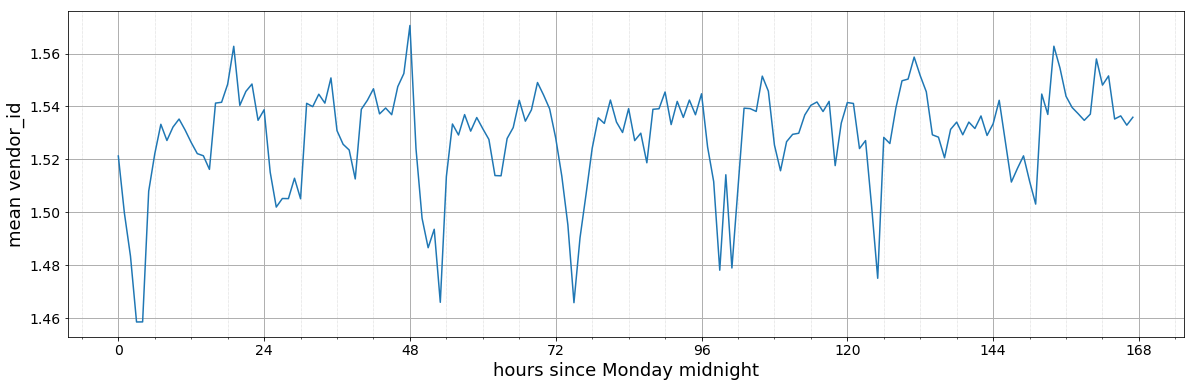

In [30]:
week_hours = df.groupby('week_hours')['vendor_id'].mean()

fig = plt.figure(figsize=(20,6))
ax = fig.gca()
ax.plot(week_hours)
ax.set_xlabel('hours since Monday midnight', fontsize=18)
ax.set_ylabel('mean vendor_id', fontsize=18)
ax.xaxis.set_major_locator(MultipleLocator(24))
ax.xaxis.set_minor_locator(MultipleLocator(6))
ax.grid(which='minor', linestyle=':', linewidth=0.5)
ax.grid(which='major', linestyle='-', linewidth=1)

Text(155,0.5,'')

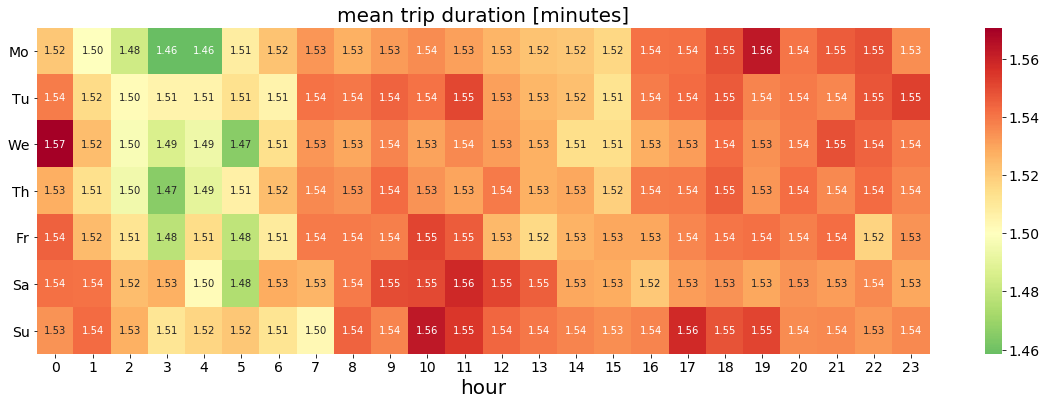

In [31]:
vendor_datetime = df.groupby(['weekday',
                              'hour']
                            )['vendor_id'].mean().reset_index()
vendor_datetime_pivot = vendor_datetime.pivot('weekday','hour','vendor_id')
fig = plt.figure(figsize=(20, 6))
ax = fig.gca()
sns.heatmap(vendor_datetime_pivot,
            cmap='RdYlGn_r',
            ax=ax,
            center=1.5,
            annot=True,
            fmt=".2f")
ax.set_title('mean trip duration [minutes]', fontsize=20)
ax.set_xlabel('hour', fontsize=20)
WEEKDAYS = ['Mo', 'Tu', 'We', 'Th', 'Fr', 'Sa', 'Su']
ax.set_yticklabels(WEEKDAYS, rotation='horizontal')
ax.set_ylabel('', fontsize=20)

## TASK 7
### Passenger count per vendor
How does the distribution of `passenger_count` per vendor look like? Are they similar?

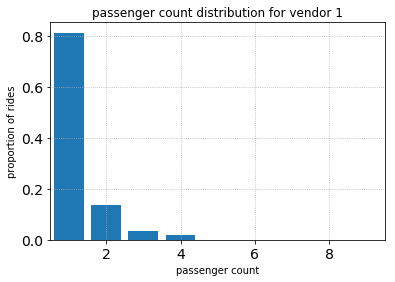

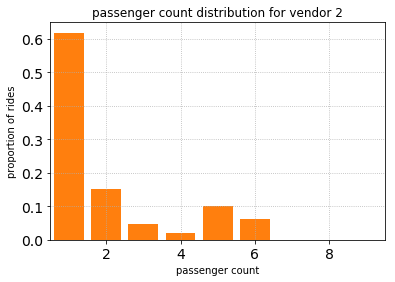

In [32]:
for vendor in [1, 2]:
    v = df[df['vendor_id'] == vendor].groupby(['passenger_count']).size()
    v = v / v.sum()
    fig = plt.figure()
    ax = fig.gca()
    ax.bar(v.index, v.values, color=f'C{vendor - 1}')
    ax.set_xlabel('passenger count')
    ax.set_ylabel('proportion of rides')
    ax.set_title(f'passenger count distribution for vendor {vendor}')
    ax.set_xlim(0.5, 9.5)
    ax.grid(linestyle=':')

Vendor 2 seems to have bigger cars as 15 % of the rides transport 5 or more passengers whereas for vendor 1 it is close to 0 %.